# Ejercicio 3 - Guia 1

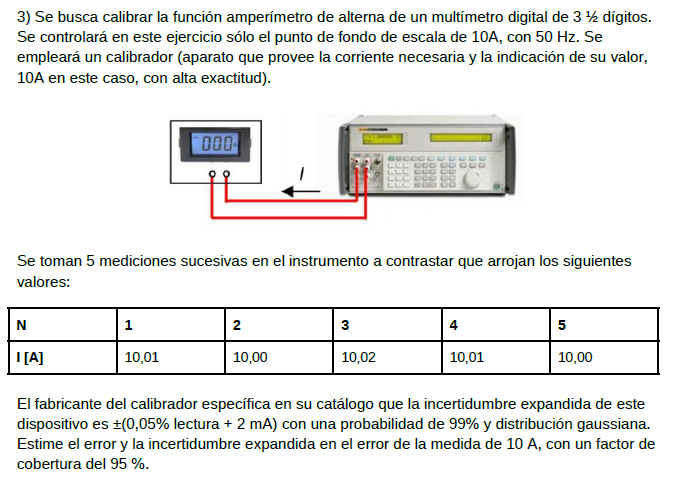

In [ ]:
import numpy as np

const = i_x - i_p     

i_x: corriente medida x el tester

i_p: corriente de referencia

In [5]:
i = [10.01, 10.00, 10.02, 10.01, 10.00]
i = np.array(i)

i_mean = i.mean()              #calculo valor medio
i_std = i.std(ddof = 1)        #calculo desvio estandar

# Si no le ponemos el ddof = 1 divide por raiz de n, en vez de raiz de n-1.
# es decir que ddof define cuantos grados de libertad le sacas a n para calcular

n = len(i)

print("Valor medio:" ,i_mean)
print("Desvio estandar:" ,i_std)
print("Numero de muestras:" ,n)

i_x = i_mean
i_p = 10

const = i_x - i_p
print("Error: %0.4f" %const)   #pedimos 4 decimales de un flout

Valor medio: 10.008
Desvio estandar: 0.008366600265340578
Numero de muestras: 5
Error: 0.0080


In [7]:
# EVALUACION TIPO A

ui_x = i_std/np.sqrt(n)      #calculo incertidumbre tipo A
print("Incertidumbre tipo A:     ui_x = %0.10f" %ui_x)

ui_p = 0                     # no hay tipo A del patrón, ya que no muestrea nada, le seteo el valor

Incertidumbre tipo A:     ui_x = 0.0037416574


In [8]:
# EVALUACION TIPO B

e_lectura = 0.05            #error de lectura
e_bias = 2e-3               #error constante

#distribución Gaussiana y cobertura del 99%

error_ip = (e_lectura/100)*i_p + e_bias      #calculo error del patrón
print("Error del patron: %0.4f" %error_ip)
    
uj_p = error_ip/3                            #calculo incertidumbre tipo B
print("Incertidumbre tipo B:    uj_p = %0.10f" %uj_p)       #se divide por 3 por el 99% de cobertura 
                                                            #(ver tabla de distribución normal --> 3 sigmas)

# En realidad, segun la tabla el valor exacto por el que habráia que divir
# es 2.575

uj_x = 0              # el tester no tiene incertidumbre Tipo B

Error del patron: 0.0070
Incertidumbre tipo B:    uj_p = 0.0023333333


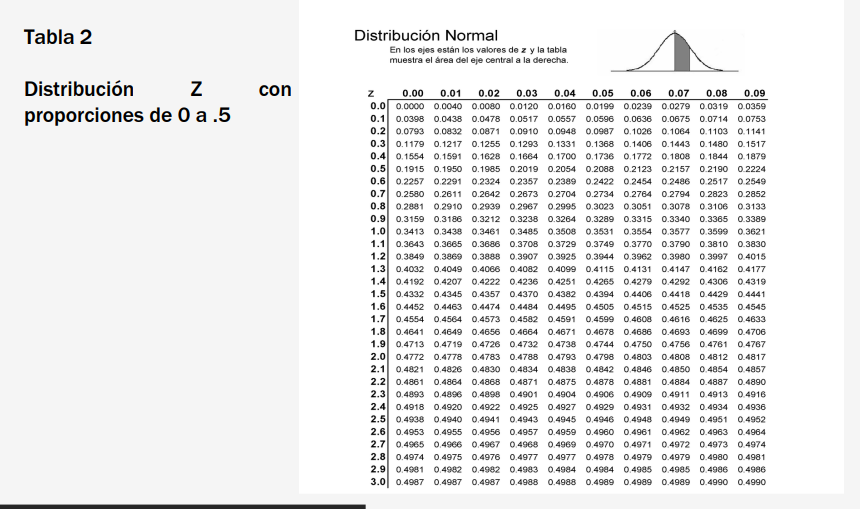

In [10]:
# INCERTIDUMBRE COMBINADA

#instrumento a calibrar
uc_x = np.sqrt(ui_x**2 + uj_p**2)

print("Incertidumbre combinada:     uc_x = %0.10f" %uc_x)
print("El valor de c es", const, "con incertidumbre uc de", uc_x)

Incertidumbre combinada:     uc_x = 0.0044095855
El valor de c es 0.007999999999999119 con incertidumbre uc de 0.0044095855184409175


In [17]:
# GRADOS EFECTIVOS DE LIBERTAD

v_eff = (uc_x**4) / (ui_x**4/(n-1))       #calculo grados efectivos de libertad 
print("Grados de libertad: %d" %v_eff)    #lo casteamos a entero

#En la formula de V_eff, la sumatoria es por cada variable. La corriente tiene infinitos grados de libertad,
#por lo que no tiene sentido poner la corriente en la sumatoria. Por otro lado, la corriente la estamos
#midiendo en forma directa, por lo que su derivada dará 1. Por eso en el denominador queda únicamnete
#la incertidumbre tipo A al cuadrado / los grados de libertad del multímetro.
                      
#Vemos que la incertidumbre combinada está dominada por la tipo A, ya que el 
#valor obtenido (7) se parece más a la tipo A que a la tipo B

Grados de libertad: 7


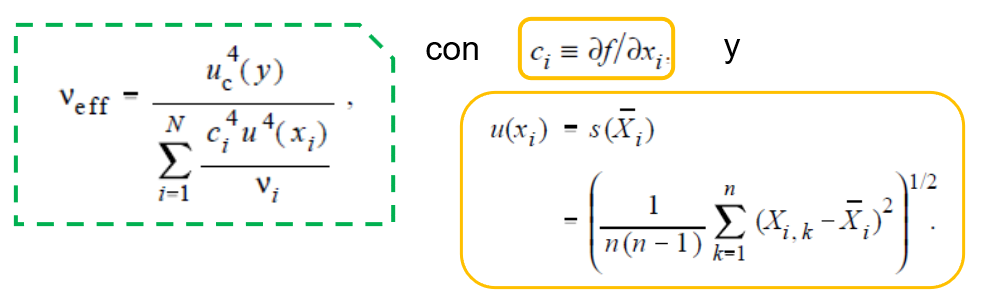 

In [14]:
# INCERTIDUMBRE EXAPNDIDA

#Con menos de 30 grados de libertad aplica la t-student, ya que no tengo 
#suficientes grados de libertad para llegar a la normal (gausseana). 

#El coeficiente K lo obtengo de la tabla de student (ver en PPT).
#En la tabla vas a la columna de  95.45 y la entrada de 7 grados de libertad,
#obteniendo K = 2.43

k = 2.43

U = k * uc_x    #incertidumbre expandida

print("El valor de c es", const, "con incertidumbre expandida U", U, "con una confianza del 95.45%")

El valor de c es 0.007999999999999119 con incertidumbre expandida U 0.010715292809811431 con una confianza del 95.45%


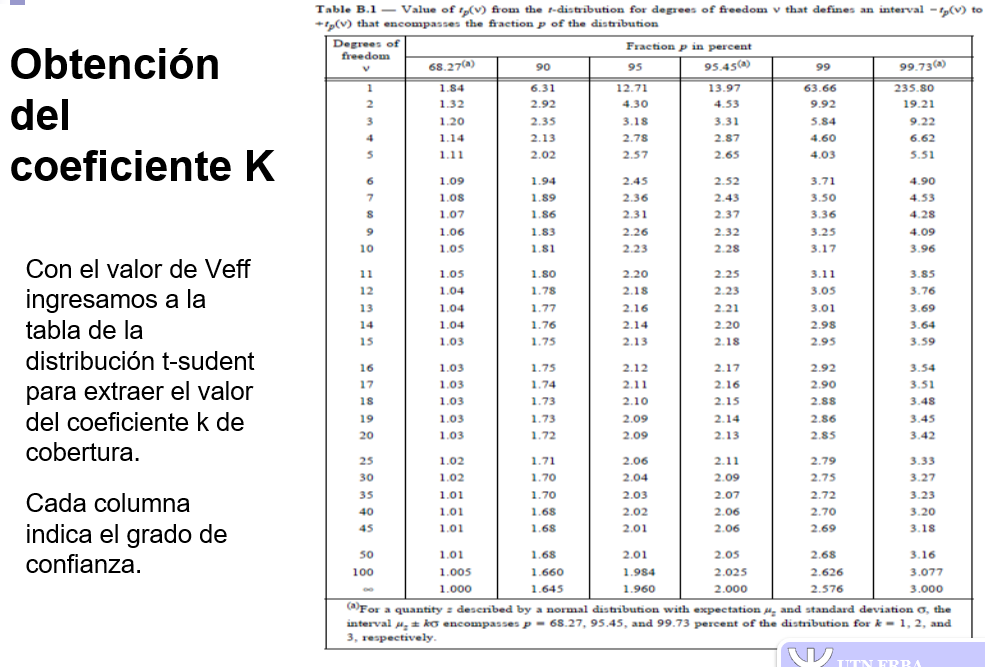